In [75]:
import pandas as pd
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('steps.csv', delimiter=';')
df2 = pd.read_csv('survey.csv')

In [76]:
import pandas as pd

df1 = pd.read_csv('steps.csv', delimiter=';')
df2 = pd.read_csv('survey.csv')

df = pd.merge(df2, df1,  on = 'id') #'app' is the common identifier (ID)
df = df[(df['weight'] < 200) & (df['weight'] > 35)]
df = df.fillna(0)
df.head()


,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
steps_per_participant = df.loc[:,'20-6-2013':].mean(axis=1)
df["average-steps"] = steps_per_participant
print(df)


      id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
927  928        Lille  Female  55-64        1          1          High school   
928  929         Lyon    Male  25-34        2          2          High school   

     height  weight  20-6-2

/Users/stefanvanbrummelen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


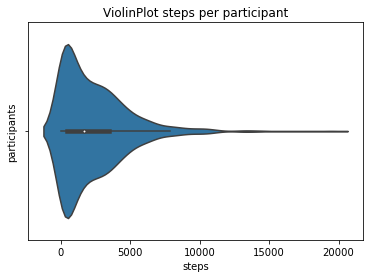

In [78]:
import matplotlib.pyplot as plt
import seaborn as sb

sns.violinplot(steps_per_participant)
plt.title('ViolinPlot steps per participant')
plt.xlabel('steps')
plt.ylabel('participants')
plt.show()

/Users/stefanvanbrummelen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


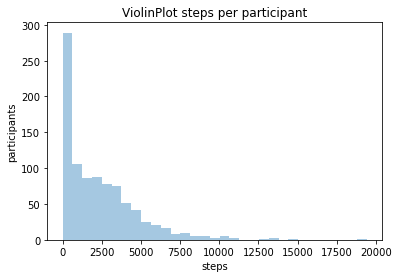

In [79]:
sns.distplot(steps_per_participant, kde=False)
plt.title('ViolinPlot steps per participant')
plt.xlabel('steps')
plt.ylabel('participants')
plt.show()

Mean steps are: 2347.462824015413 steps
Median steps are: 1660.1798780487804 steps
Median steps are: 2412.5696552949466 steps


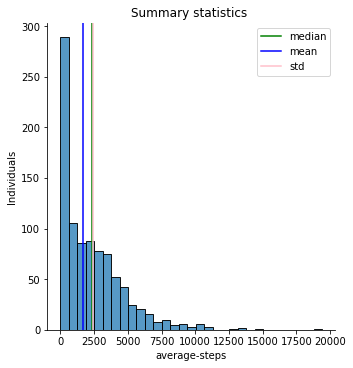

In [80]:
import numpy as np

mean = df['average-steps'].mean()
median = df['average-steps'].median()
std = np.std(df['average-steps'])

print(f'Mean steps are: {mean} steps')
print(f'Median steps are: {median} steps')
print(f'Median steps are: {std} steps')


sns.displot(df['average-steps'], kde=False)
plt.title('Summary statistics ')
plt.ylabel('Individuals')
plt.axvline(mean, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(median, 0, 100, color='blue', label='mean') 
plt.axvline(std, 0, 100, color='pink', label='std') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

##### We can characterize the distribution as follows:
* Normality: the distribution is not normal at all (it's the curve). Most values are [x].
* Variation: there is little variation. Most values are [x].
* Modality: there is one peak
* Skewness: the distribution is skewed to the right. However, most values are 0 so the skew is minimal.
* Outliers: there are not really outliers. There are no values that are very far from the trend.

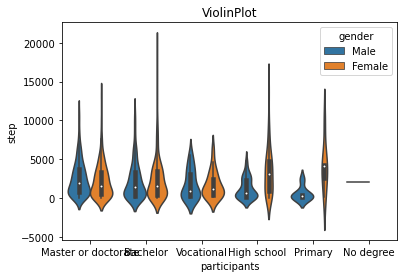

In [81]:
plt.title('ViolinPlot')
sns.violinplot(x="education_1", hue="gender", y="average-steps", data=df)
plt.xlabel('participants')
plt.ylabel('step')
plt.show()

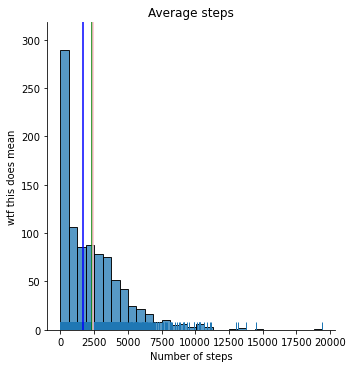

In [82]:
sns.displot(df['average-steps'], rug=True)

plt.axvline(mean, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(median, 0, 100, color='blue', label='mean') 
plt.axvline(std, 0, 100, color='pink', label='std') 

plt.title('Average steps')
plt.xlabel('Number of steps')
plt.ylabel('wtf this does mean')
plt.show()

In [89]:
Bmi = df['weight'] / ((df['height'] / 100) * (df['height'] / 100))
df['BMI'] = Bmi
df = df[df["BMI"] < 60]
df



,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,average-steps,BMI
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5133.875000,30.930438
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2826.371951,23.765432
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,3745.902439,25.617284
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.536585,25.249337
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,874.557927,21.872423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1742.908537,21.671258
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,731.689024,24.414062
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6268.954268,21.672110
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3872.115854,21.971336


In [102]:
sns.pairplot(df)
plt.show()